In [50]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
%matplotlib inline

In [51]:
import yfinance as yf
data = yf.download("BTC-USD")[['Close']]
data.index = pd.to_datetime(data.index)
data.head().round(2)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2014-09-17,457.33
2014-09-18,424.44
2014-09-19,394.80
2014-09-20,408.90
2014-09-21,398.82


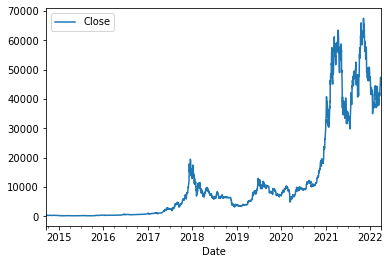

In [52]:
data.plot()
plt.show()

In [53]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data, autolag='AIC' )
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -0.84
5% Critical Value: -2.86
p-value: 0.81


The p-value is greater than 0.05. We fail to reject the null hypothesis and conclude that the time series is not stationary.

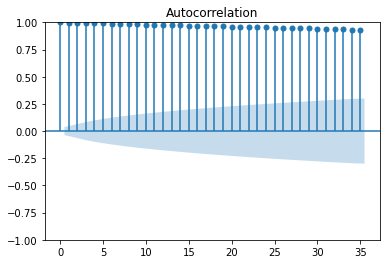

In [54]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
# Calculate the ACF (via statsmodel)
plot_acf(data)
# Show the data as a plot (via matplotlib)
plt.show()

C:\Users\rana_\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


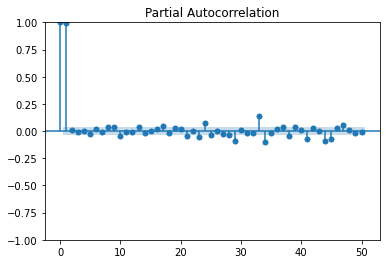

In [55]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_pacf(data, alpha =0.05, lags=50)
plt.show()

<ipython-input-56-93b23c269b9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Diff'] = data['Close'].diff()
<ipython-input-56-93b23c269b9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Diff'] = data['Diff'].dropna()


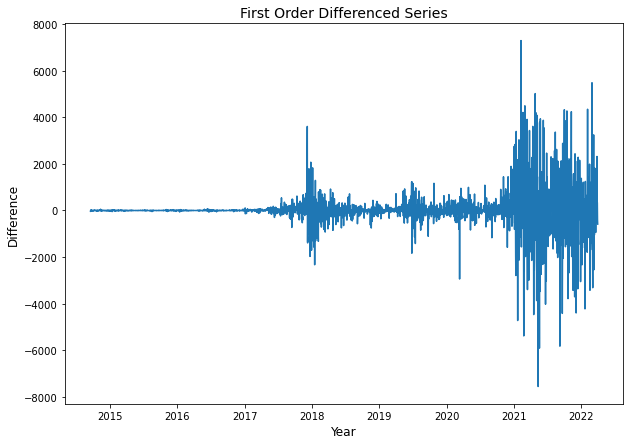

In [56]:
#because it is not stationnary, we make stationary
# Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
data['Diff'] = data['Close'].diff()
data['Diff'] = data['Diff'].dropna()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(data['Diff'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [57]:
result = adfuller(data.Diff.dropna(), autolag='AIC' )
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -8.64
5% Critical Value: -2.86
p-value: 0.00


In [58]:
#now it is stationnary

In [59]:
#now we split data, to create model and do prediction
import numpy as np
from sklearn.model_selection import train_test_split
train, test = train_test_split(data['Diff'])

In [60]:
train.sort_index() # pour que les données soient en order

Date
2014-09-17            NaN
2014-09-19     -29.644012
2014-09-21     -10.082977
2014-09-23      33.638977
2014-09-24     -12.585999
                 ...     
2022-03-26     152.097656
2022-03-27    2319.664062
2022-03-28     307.511719
2022-03-30    -403.066406
2022-03-31    -585.878906
Name: Diff, Length: 2064, dtype: float64

In [61]:
train

Date
2019-01-17      23.557129
2017-01-20      -4.046997
2018-01-07   -1049.400391
2017-04-23     -24.500000
2015-01-14     -47.757996
                 ...     
2016-09-04      10.421997
2018-12-11     -78.067871
2021-08-28    -156.265625
2017-08-11     269.340088
2019-06-01     -10.485352
Name: Diff, Length: 2064, dtype: float64

In [62]:
len(train)

2064

In [63]:
len(test)

689

In [64]:
data

,Close,Diff
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,-32.894012
2014-09-19,394.795990,-29.644012
2014-09-20,408.903992,14.108002
2014-09-21,398.821014,-10.082977
...,...,...
2022-03-27,46820.492188,2319.664062
2022-03-28,47128.003906,307.511719
2022-03-29,47465.730469,337.726562


In [71]:
index= data.shape[0]-2064
train, test = data['Diff'][0:2064], data['Diff'][2064:]

In [72]:
test.index[0]
len(test)


689

In [73]:
from statsmodels.tsa.arima.model import ARIMA

In [74]:
train=train.dropna()
model1 = ARIMA(train, order=(1,1,2))
result = model1.fit()
result.summary()
pred=result.predict(0,len(train))
pred

C:\Users\rana_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rana_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rana_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2014-09-18     0.000000
2014-09-19   -30.572822
2014-09-20   -30.119735
2014-09-21   -15.725487
2014-09-22   -14.366499
                ...    
2020-05-08     5.244237
2020-05-09     3.851292
2020-05-10     4.974278
2020-05-11     2.946129
2020-05-12     4.922894
Freq: D, Name: predicted_mean, Length: 2064, dtype: float64

In [88]:
from statsmodels.tools.eval_measures import rmse
pred1=result.predict(start=test.index[0], end=test.index[-1], exog=test)
pred1

2020-05-12    4.922894
2020-05-13    2.975672
2020-05-14    4.917948
2020-05-15    2.980606
2020-05-16    4.913027
                ...   
2022-03-27    4.119233
2022-03-28    3.777293
2022-03-29    4.118364
2022-03-30    3.778159
2022-03-31    4.117500
Freq: D, Name: predicted_mean, Length: 689, dtype: float64

In [89]:
rmse1 = rmse(pred1, test)
rmse1

1498.1303632775864

In [90]:
train

Date
2014-09-18    -32.894012
2014-09-19    -29.644012
2014-09-20     14.108002
2014-09-21    -10.082977
2014-09-22      3.330994
                 ...    
2020-05-07    682.756836
2020-05-08   -108.852539
2020-05-09   -248.769531
2020-05-10   -837.465820
2020-05-11   -154.634766
Name: Diff, Length: 2063, dtype: float64

In [91]:
model2 = ARIMA(train, order=(2,0,1))
result2 = model2.fit()
pred2=result2.predict(start=2064, end=2064+688)
pred2

C:\Users\rana_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rana_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rana_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2020-05-13    10.363118
2020-05-14     6.179729
2020-05-15     4.645360
2020-05-16     4.161224
2020-05-17     4.013117
                ...    
2022-03-28     3.948550
2022-03-29     3.948550
2022-03-30     3.948550
2022-03-31     3.948550
2022-04-01     3.948550
Freq: D, Name: predicted_mean, Length: 689, dtype: float64

In [92]:
rmse2 = rmse(pred2, test)
rmse2

1498.1120156874754

In [98]:
model3 = ARIMA(train, order=(1,1,3))
result3 = model3.fit()
pred3=result3.predict(start=2064, end=2064+687)
pred3


C:\Users\rana_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rana_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rana_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2020-05-13    3.571773
2020-05-14    4.319656
2020-05-15    3.572084
2020-05-16    4.319345
2020-05-17    3.572395
                ...   
2022-03-27    4.227283
2022-03-28    3.664419
2022-03-29    4.227049
2022-03-30    3.664653
2022-03-31    4.226815
Freq: D, Name: predicted_mean, Length: 688, dtype: float64

In [94]:
rmse3 = rmse(pred3, test)
rmse3

1498.1033610823376

In [95]:
#The first model is the best medel with the lowest rmse

In [99]:
pred5=result.predict(len(data), len(data)+4)
pred5

2022-04-02    4.116640
2022-04-03    3.779878
2022-04-04    4.115785
2022-04-05    3.780732
2022-04-06    4.114934
Freq: D, Name: predicted_mean, dtype: float64